In [16]:
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
# 对于Service函数，目前看来，可以选择不注明，不导入，直接在webdriver.Chrome()输入驱动地址即可

In [60]:
driver = webdriver.Chrome(service=Service(r'chromedriver.exe'))

In [18]:
# get网站请求 baidu
driver.get('https://www.baidu.com')

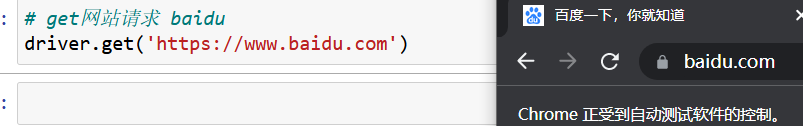

## Point：在get（）到对应网址后，如何选择对应的元素进行操作
### 需要指定对网站，具体对那个元素进行操作
#### 选择元素是最为重要的基础部分，根据浏览器解析出的http源码的文本特征进行选择

使用 F12 进入开发者模式，使用指针箭头，进行元素寻找

    比如将指针移至 baidu 图标，就会高亮显示
        源码语言 为 HTML 语言，为image
            根据标签名就是<img> 来寻找
            
    另外一种方法,就是鼠标右键点击检查

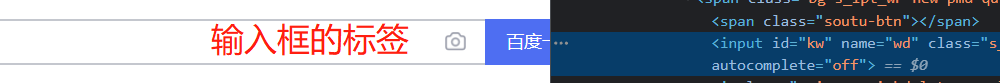

#### 如何区分标签与属性, 标签为img理解为类别,属性则是具体数据值
##### 上图中的输入框, 其标签为input,属性就是后者的 name="wd"等等
    有时候寻找数据可能标签相同, 此时我们要根据属性来具体区分是哪一个html对象

1. 根据 id 属性查看 对象

        根据 html 语言规范, 网站中某个对象的 id 必须是唯一的
            但是有些网站不按照规范, id 是不唯一的, 但是这种情况是极其少的, 我们不考虑
                就跟 身份证号 相似, 个人唯一
   以下代码根据 id 属性 寻找 元素对象, 然后完成交互

In [39]:
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

# 创建 WebDriver 对象
driver = webdriver.Chrome(service=Service(r'chromedriver.exe'))

In [40]:
# 调用WebDriver 对象的get方法 可以让浏览器打开指定网址
driver.get('https://www.byhy.net/_files/stock1.html')

# 根据id选择元素，返回的就是该元素对应的WebElement对象
#    在这里元素指的就是 webelement 对象

# 通过drive.findo_element 方法,使用ID, 并且输入id 名找到对应元素
#     程序利用 driver 来对网站进行寻找操作, 返还的element返还的是 element对象,有对应的方法
element = driver.find_element(By.ID, 'kw')

# 通过该 WebElement对象，就可以对页面元素进行操作了
# 比如输入字符串到 这个 输入框里
#     对应元素的操作就直接是element.方法即可
    #   目前看来 单个元素 有20 种方法,这里暂时不一一介绍了
element.send_keys('通讯\n')
# 这里\n就表示回车按键,
# 如果不使用\n,还可以单独找到回车元素
#   然后对该元素使用点击方法

# 例如以下代码
element.send_keys('通讯')
element2 = driver.find_element(By.ID, 'go')   # 其中搜索标签的 id 为 go
element2.click()
# 其中click()就是 点击方法

In [37]:
# 正常执行完了, 需要有一个 driver.quit() 操作
        # 其目的为, 关闭该driver对象, 那么同样也会关闭chrome浏览器
driver.quit()

In [25]:
element

<selenium.webdriver.remote.webelement.WebElement (session="5c2d813abcfd304b0fa0b63766a9053e", element="8E9DB2DA32B1A5B0255EC0E9C22681DE_element_2")>

### 根据这一过程对 amazone 抓取分析

    1. 初始化 chrome driver
    2. driver 发送get 请求 给需要抓取的商品页面 网站
    3. 寻找到所有评论元素, 以及next page元素
        寻找元素, 目前学到的是根据 driver.element(By.Id, 'kw') 寻找
                                还有 By.NAME等等
    4. 通过评论元素, 来获取评论内容 text
        然后进行next page翻页

In [33]:
# # 注: 如果对应id找不到, 就会报错, 找不到对应元素
# element2 = driver.find_element(By.ID, 'kw3')

# 以上代码会抛出异常 error
# 我们可以用 try 来捕获异常
from selenium.common.exceptions import NoSuchElementException
try: 
    element2 = driver.find_element(By.ID, 'kw3')
except NoSuchElementException:
    # 元素不存在的处理,这里就是打印了元素不存在操作而已
    print("对应ID的元素不存在")

对应ID的元素不存在


### 需要了解各种方法来定位元素, 这是最重要, 最基础的, 很多自动化程序
###         点击与输入就占了90%, 而对于爬虫, 定位元素也是重中之重

In [41]:
# 2. 使用 class 属性来寻找 元素对象
    # 并不是所有的元素都有对应的 id 属性, 有时是不存在的 (目前有点疑惑)
    # 但是我们一般优先 根据 id 来寻找元素
    #  其中 紫色的字 为 标签名, 跟在紫色后面的 黄色的字 为 属性

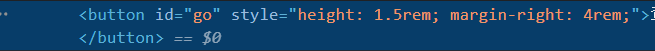

针对以上这张图, 其中该元素对象, button 就是 tag标签, id style就是属性(相对于属性值来说是属性名), 那么字符串就是属性值

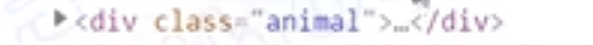

可以看到, 针对上图, div 就是标签(名), class就是属性(名),其值为"animal", 单个元素似乎是根据尖括号 来分隔

In [43]:
# 2. 根据 class 属性来寻找元素对象
driver = webdriver.Chrome(service=Service(r'chromedriver.exe'))
driver.get('https://cdn2.byhy.net/files/selenium/sample1.html')

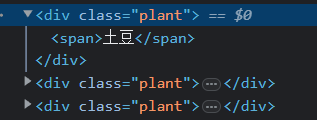

上图中, 每个div包含内容可以理解为一个元素对象, 可以被展开, 这个元素对象只有一个属性, class属性

In [ ]:
# 我们使用 id 是寻找单个元素, 如果我们要寻找所有的像同类 元素 就可以使用 find_elements_by_class_name('animal')
# 以上是寻找到了所有 class 为 animal 的 元素
# 如果没有 s 就是找到单个对象了

In [46]:
list_elements = driver.find_elements_by_class_name(name='animal') # 其返还的是一个列表
# :Returns:
#  - list of WebElement - a list with elements if any was found.  An
#    empty list if not
print(list_elements[2])

<selenium.webdriver.remote.webelement.WebElement (session="0d4072bdbb429f4fdc243e81e0dcb760", element="A3361CCAA779C56D1CCDB09C0D0AF722_element_12")>


D:\Anaconda3\envs\hp\Lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  """Entry point for launching an IPython kernel.


In [52]:
# 似乎如果定义html 没有人为定义id, 会自动定义id
# 其中单个元素.text属性, 就是文本内容
    # 可以通过这种方法获取文本内容
print(list_elements[1].id)
print(list_elements[1].text)

for i in list_elements:
    print('\t'+i.text)

A3361CCAA779C56D1CCDB09C0D0AF722_element_11
老虎
	狮子
	老虎
	山羊


In [56]:
# find_elements 与 find_element 区别

#     前者如果没有找到符合 属性的 元素， 返还的是空列表
#     然而后者是 抛出错误

list_elements2 = driver.find_elements_by_class_name(name='animal33')
print(type(list_elements2), list_elements2)

<class 'list'> []


D:\Anaconda3\envs\hp\Lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  


### 3. 根据元素的标签名 tag 来寻找元素
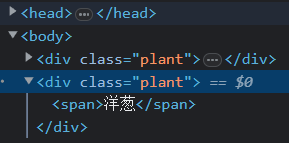
以上这张图中，有tag标签 head div span body

In [57]:
# 找出所有标签名为 span 的元素，对于span元素，在这都有text文本
list_elements3 = driver.find_elements_by_tag_name('span')
for i in list_elements3:
    print(i.text)

土豆
洋葱
白菜
狮子
老虎
山羊
内层11
内层12
内层21
版权
发布日期：2018-03-03
备案号 苏ICP备88885574号


D:\Anaconda3\envs\hp\Lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_tag_name is deprecated. Please use find_elements(by=By.TAG_NAME, value=name) instead
  


In [ ]:
# 什么时候根据class，id，tag去寻找
    # 实际是根据你要寻找的元素的特征来寻找

## ==============================

In [ ]:
# 实际官方都不推荐直接使用 find element(s) by 属性名
    # 现在都是推荐 find_element(s)(By.class or name span)
# 虽然能运行，但是不推荐，且会产生警告
#  Please use find_elements(by=By.TAG_NAME, value=name) instead
# 要导入一个类，以下代码

#  from selenium.webdriver.common.by import By

#  class selenium.webdriver.common.by.By

#     Bases: object

#     Set of supported locator strategies.

#     CLASS_NAME = 'class name'

#     CSS_SELECTOR = 'css selector'

#     ID = 'id'

#     LINK_TEXT = 'link text'

#     NAME = 'name'

#     PARTIAL_LINK_TEXT = 'partial link text'

#     TAG_NAME = 'tag name'

#     XPATH = 'xpath'

## 4. 实际不仅 WebDriver 有寻找元素的方法，WebElement 也有寻找元素的方法
##     WebDriver 寻找元素是整个页面，但是WebElement则是在子元素中寻找，理解为元素内部

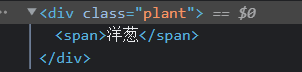

以上图片中 单个元素可以被展开，其中有span标签对应的子元素，其文本内容为洋葱
    
    但是对于div标签的这个元素，其文本内容就是span对应的文本内容，共同的
    其中两个div，内部定义为一个元素

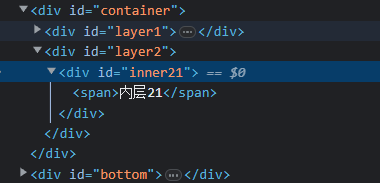
整个contrainer类名，可以看到有两层子元素，其中每个元素又可以抽取文本

In [61]:
# 实例
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

wd = webdriver.Chrome(service=Service(r'chromedriver.exe'))

wd.get('https://cdn2.byhy.net/files/selenium/sample1.html')
    
element = wd.find_element(By.ID,'container')

# 限制 选择元素的范围是 id 为 container 元素的内部。
spans = element.find_elements(By.TAG_NAME, 'span')
for span in spans:
    print(span.text)
    
# 如果通过webdriver去寻找，会得到非常多的符合条件的 span 文本

内层11
内层12
内层21


# 5. 等待元素的加载与出现

In [64]:
# 实例
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

wd = webdriver.Chrome(service=Service(r'chromedriver.exe'))

wd.get('https://www.byhy.net/_files/stock1.html')

element = wd.find_element(By.ID, 'kw')

element.send_keys('通讯\n')

# import time
# time.sleep(1)
# 返回页面 ID为1 的元素
element = wd.find_element(By.ID,'1')
# 打印该元素的文字内容
print(element.text)

国美通讯
代码：600898


可以看到上面这段代码中，抛出了错误，具体是没有找到ID为1的element，实际查阅源码发现存在id=1的代码
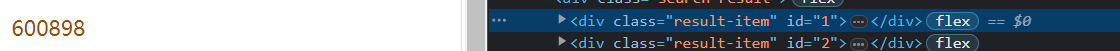
原因是由于回车后，界面还没有完成跳转，此时就执行了下一个语句
    由于界面停留在上一个语句，因此寻找wd元素范围也在上一个界面
        故无法找到id 为 1元素

界面跳转时间，受限于本地处理速度，服务器反应速度，网速等等
    
    一般网页跳转时间为100ms
        但是我们代码执行时间远远低于100ms
     因此，代码执行的时间应该长于界面反应时间，才能保证在界面更新后，再执行代码

In [67]:
# import time
# time.sleep(0.5)

print("但是仍然有一个问题，就是界面反应时间假设非常长，此时就没办法保证")
print("\t个人想法，其实此时应该对比两个界面 是否相同")

# 做成一个循环，异常捕获也是可以的

    # while True:
    #     try:
    #             element = wd.find_element(By.ID, '1')
    #             print(element.text)
    #             break
    #     except:
    #             time.sleep(1)


# 实际 wd.implicitly_wait(10) Selenium 的 Webdriver 对象 有个方法叫 implicitly_wait 
# 叫做隐式等待，或者全局等待, 最大等待时间为10秒，但是会每隔0.5秒查询一次，直至成功
            # 这是一种全局设置，只是针对 find_element(s) 定位操作, 查找元素操作，而不针对其他操作
            
    # wd = webdriver.Chrome()
    # wd.implicitly_wait(10)
    
    # wd.get('https://www.byhy.net/_files/stock1.html')
    
# 还可以全局使用elements，然后判断返回值是否为空
    # 如果为空，循环执行，直至成功 break

但是仍然有一个问题，就是界面反应时间假设非常长，此时就没办法保证
	个人想法，其实此时应该对比两个界面 是否相同
